### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_3675863d82', 'id': 'chatcmpl-Bu2RsEIAfr9KqqRrj2PvRQFxQueFa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d837dce2-8d3f-492e-a667-5b2cfdf1e2b4-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="<think>\nOkay, the user is Krish and he likes to play cricket. I need to respond in a friendly and engaging way. Let me start by acknowledging his name and his interest in cricket. Maybe ask about his favorite part of the game or the position he plays. I should keep the conversation open-ended so he can share more. Also, perhaps mention some cricket players he might look up to or suggest ways to improve his game. I should make sure to keep the tone positive and encouraging. Let me check if there's anything else I need to consider. No, the main points are covered. Alright, time to put it all together in a natural way.\n</think>\n\nHi Krish! 🏏 That's awesome that you love cricket—it's such an exciting game! Do you play any specific position, like batting, bowling, or fielding? I'd love to hear what part of the game you enjoy most! Also, do you follow any particular teams or players? Maybe we can discuss some tips or fun facts about the sport too! 😊", additional_kwargs=

### We Will start With Creating Nodes

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

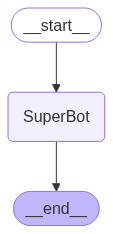

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Suman And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='9c77cd56-cba3-40a4-b9ca-c026131f4e0f'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Suman and mentioned they like cricket. I should acknowledge their introduction and express that I'm glad to meet them. Since Suman likes cricket, I can ask them about their favorite teams or players to keep the conversation going. I should also invite them to ask questions or share more about their interests to foster further interaction. Keep the tone friendly and open. Check for any typos or errors in the response. Make sure the response is concise and not too long. Use proper grammar and punctuation. Avoid using any markdown formatting. Make sure the response is in the same language as the user's message.\n</think>\n\nHi Suman! Nice to meet you, and cricket is an amazing sport to love. Do you have a favorite team or player? I'd love to hear more about 

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I need to respond appropriately.\n\nFirst, welcome them and acknowledge their name. Then, engage them by asking about their favorite player or a memorable match. Keep the tone friendly and open-ended to encourage conversation. Make sure the response is concise and in English, as per the instructions. Avoid any markdown formatting. Let me put that together.\n</think>\n\nHi Krish! Nice to meet you. 🏏 Cricket is such an exciting sport—do you have a favorite player or a memorable match you love to watch? Let me know if you'd like to chat more about it!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 18, 'total_tokens': 150, 'completion_time': 0.293976764, 'prompt_time': 0.000473513, 'queue_time': 0.068889747, 'total_time': 0.294450277}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3'

In [10]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='c5570a76-fbdf-43cc-adde-dcb9b473945e'), AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I need to respond appropriately.\n\nFirst, welcome them and acknowledge their name. Then, engage them by asking about their favorite player or a memorable match. Keep the tone friendly and open-ended to encourage conversation. Make sure the response is concise and in English, as per the instructions. Avoid any markdown formatting. Let me put that together.\n</think>\n\nHi Krish! Nice to meet you. 🏏 Cricket is such an exciting sport—do you have a favorite player or a memorable match you love to watch? Let me know if you'd like to chat more about it!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 18, 'total_tokens': 150, 'completion_time': 0.293976764, 'prompt_time':

In [11]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, let's see. The user mentioned they like football again. They already said that once before, so I need to make sure I don't repeat the same response. The previous assistant reply asked about teams, leagues, and favorite players. The user hasn't provided that info yet. Now they're saying they like football again, maybe to emphasize or add more context.\n\nI should acknowledge their interest again but push for more details. Maybe ask about their favorite teams or players. Also, check if they have any specific aspects of football they enjoy, like the strategy, the players' skills, or the excitement of the matches. Maybe mention some popular leagues or tournaments to spark a conversation. Need to keep it friendly and engaging. Avoid being too pushy but encourage them to share more so I can respond better. Let me also think of some examples to make the response more relatable. Maybe mention some well-known players or teams as optio

In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='c5570a76-fbdf-43cc-adde-dcb9b473945e'), AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I need to respond appropriately.\n\nFirst, welcome them and acknowledge their name. Then, engage them by asking about their favorite player or a memorable match. Keep the tone friendly and open-ended to encourage conversation. Make sure the response is concise and in English, as per the instructions. Avoid any markdown formatting. Let me put that together.\n</think>\n\nHi Krish! Nice to meet you. 🏏 Cricket is such an exciting sport—do you have a favorite player or a memorable match you love to watch? Let me know if you'd like to chat more about it!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 18, 'total_tokens': 150, 'completion_time': 0.293976764, 'prompt_time':

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Suman and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Suman and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'c3f27182-5935-41d7-b89e-f431a9d4d076', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='c5570a76-fbdf-43cc-adde-dcb9b473945e'), AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I need to respond appropriately.\n\nFirst, welcome them and acknowledge their name. Then, engage them by asking about their favorite player or a memorable match. Keep the tone friendly and open-ended to encourage conversation. Make sure the response is concise and in English, as per the instructions. Avoid any markdown formatting. Let me put that together.\n</think>\n\nHi Krish! Nice to meet you. 🏏 Cricket is such an exciting sport—